# Lab 5: PCA Visualization

### This dataset is extracted from the UCI Dataset Repository whcih has the name "Wine Quality." This data was donated to UCI in October 6th, 2009. Thus, the data shows us information about different chemical composition levels of different red and white wine samples as well as the final quality score for each of them. The number of instances of the red wine is 1599 and the white wine is 4898.

This Wine Dataset will be used for displaying PCA Visualizations. With more types of dimensions and matrix analysis. The components of the wine quality data would be analyzed and understood better with Principal Component Analysis.

In [5]:
# Import necessary libraries
import pandas as pd
import pprint
import numpy as np
import matplotlib.pyplot as plt

# This loads the data
df_red = pd.read_csv("winequality-red.csv", delimiter=';')
df_white = pd.read_csv("winequality-white.csv", delimiter=';')

In [6]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


This is the 4 data column values that we selected to analyze.

In [9]:
# Convert to DataFrame for easier handling
selected_features = df_red[["fixed acidity", "volatile acidity", "citric acid", "residual sugar"]]
selected_features.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar
0,7.4,0.70,0.00,1.9
1,7.8,0.88,0.00,2.6
2,7.8,0.76,0.04,2.3
3,11.2,0.28,0.56,1.9
4,7.4,0.70,0.00,1.9


We will now use Standard Scaling to transfform our data.

In [15]:
from sklearn.preprocessing import StandardScaler
# PCA is sensitive to scale, so we standardize the data first
scaler = StandardScaler()
X = selected_features.values
feature_names = selected_features.columns.tolist()
X_scaled = scaler.fit_transform(X)

# -------------------------
# Compute the Covariance Matrix
# -------------------------
# The covariance matrix shows how variables vary with respect to each other
cov_matrix = np.cov(X_scaled, rowvar=False)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 1.00062578 -0.25629118  0.67212377  0.11484855]
 [-0.25629118  1.00062578 -0.55284143  0.00191908]
 [ 0.67212377 -0.55284143  1.00062578  0.14366701]
 [ 0.11484855  0.00191908  0.14366701  1.00062578]]


Now let's visualize the covariance matrix with Seaborn Heatmap

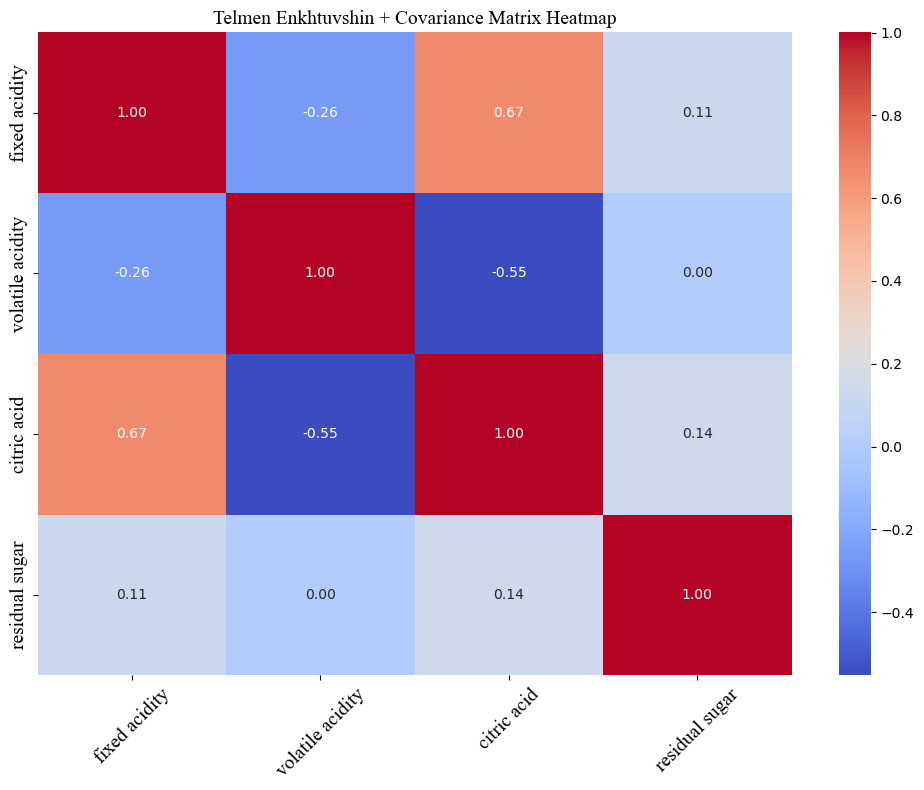

In [48]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(
    cov_matrix,
    annot=True,             # Show numbers in cells
    fmt=".2f",              # Format to 2 decimal places
    cmap="coolwarm",
    xticklabels=feature_names,
    yticklabels=feature_names,
    cbar=True
)

plt.title("Telmen Enkhtuvshin + Covariance Matrix Heatmap", fontname='Times New Roman', fontsize=14)
plt.xticks(rotation=45, fontsize=14, fontname='Times New Roman')
plt.yticks(fontsize=14, fontname='Times New Roman')
plt.tight_layout()
plt.savefig("Lab5-Telmen_Enkhtuvshin-PCAHeatmap.png", dpi=300, bbox_inches='tight')
plt.show()

### As we can see, the covariance of the variables are tremendously varied such that there are a diverse amount of relationships between different values. The diagonal of course means the variable fully has a direct relationship with itself. In this heatmap, we can see that relationships are duplicated in mirror to the diagonal. So, there are only 6 pairs of relationships that we must consider. There are three positive covariance relationships, two negative relationships and only one zero-value relationship that means the value of volatile acidity and residual sugar does not have any relationship with each other.

Now we will compute the eigenvectors and eigenvalues.

Eigenvalues:
[2.03112709 0.24204343 0.72420914 1.00512348]
Eigenvectors:
                       PC1       PC2       PC3       PC4
fixed acidity     0.562257 -0.535427 -0.626019  0.072704
volatile acidity -0.488191  0.370483 -0.716682  0.332834
citric acid       0.649865  0.756358 -0.067079 -0.033151
residual sugar    0.152355 -0.063120  0.299945  0.939594


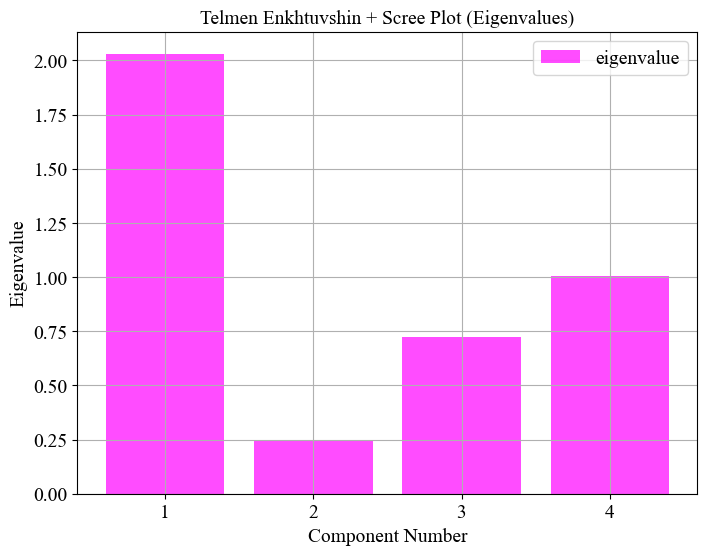

In [41]:
# -------------------------
# Compute Eigenvalues and Eigenvectors
# -------------------------
# These describe the directions (eigenvectors) and magnitude (eigenvalues) of variance
from matplotlib.font_manager import FontProperties

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
Eigenvectors = pd.DataFrame(
    eigenvectors,
    index=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar'],
    columns=['PC1', 'PC2', 'PC3', 'PC4']
)
print(Eigenvectors)

times_new_roman = FontProperties(family='Times New Roman', size=14)

# Plot eigenvalues in a scree plot
plt.figure(figsize=(8, 6))
components = np.arange(1, len(eigenvalues) + 1)
plt.bar(components, eigenvalues, color='magenta', alpha=0.7, label='eigenvalue')
plt.xlabel('Component Number', fontsize=14, fontname='Times New Roman')
plt.ylabel('Eigenvalue', fontsize=14, fontname='Times New Roman')
plt.title('Telmen Enkhtuvshin + Scree Plot (Eigenvalues)', fontsize=14, fontname='Times New Roman')
plt.xticks(components, fontsize=14, fontname='Times New Roman')
plt.yticks(fontsize=14, fontname='Times New Roman')
plt.legend(loc='best', prop=times_new_roman)
plt.grid(True)
plt.savefig("Lab5-Telmen_Enkhtuvshin-PCA-ScreePlot.png", dpi=300, bbox_inches='tight')
plt.show()

### As we can see from this Scree Plot, there are four eigenvalues that are visualized. Thus, the first component is the maximum significant eigenvalue component which covers most of the relationships. The other component 4 is the next highest value with component 3 coming in next, and component 2 has the lowest eigenvalue.

# PCA Plot 1: 

2D PCA Explained Variance Ratio:
[0.50746421 0.25112372]


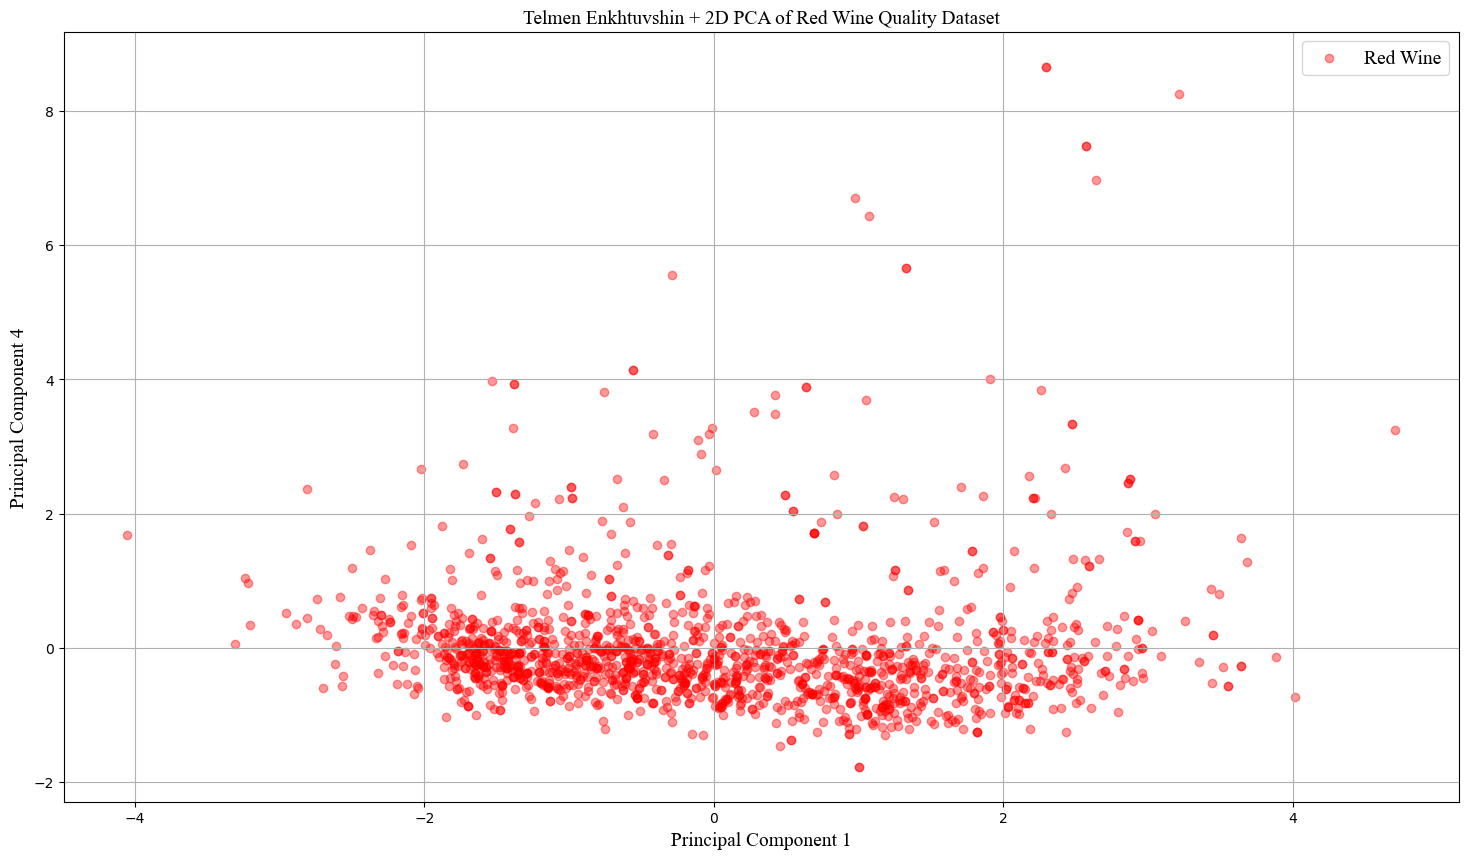

In [46]:
from sklearn.decomposition import PCA
# 2D PCA
pca2d = PCA(n_components=2)
X_pca_2d = pca2d.fit_transform(X_scaled)
pca2d_df = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC4'])

# Print explained variance ratio for 2D PCA
print("2D PCA Explained Variance Ratio:")
print(pca2d.explained_variance_ratio_)
plt.figure(figsize=(18, 10))
plt.scatter(pca2d_df['PC1'], pca2d_df['PC4'], alpha=0.4, color='red', label='Red Wine')
    
plt.xlabel('Principal Component 1', fontname='Times New Roman', fontsize=14)
plt.ylabel('Principal Component 4', fontname='Times New Roman', fontsize=14)
plt.title('Telmen Enkhtuvshin + 2D PCA of Red Wine Quality Dataset', fontname='Times New Roman', fontsize=14)
plt.legend(loc='best', prop=times_new_roman)
plt.grid(True)
plt.savefig("Lab5-Telmen_Enkhtuvshin-2dPCA.png", dpi=300, bbox_inches='tight')
plt.show()

### As we can see from the 2D PCA visualization, principal component  1 and 4 are plotted to display the relationship between them. Therefore, Principal Component 1 has a long range of values, where PC4 has clustered values around 0 and there are other clustedred values with negative value and some outliers that have positive values. Overall, we can say that these two Principal Components have inverse relationship.

# PCA Plot 2:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


3D PCA Explained Variance Ratio:
[0.50746421 0.25112372 0.18093906]


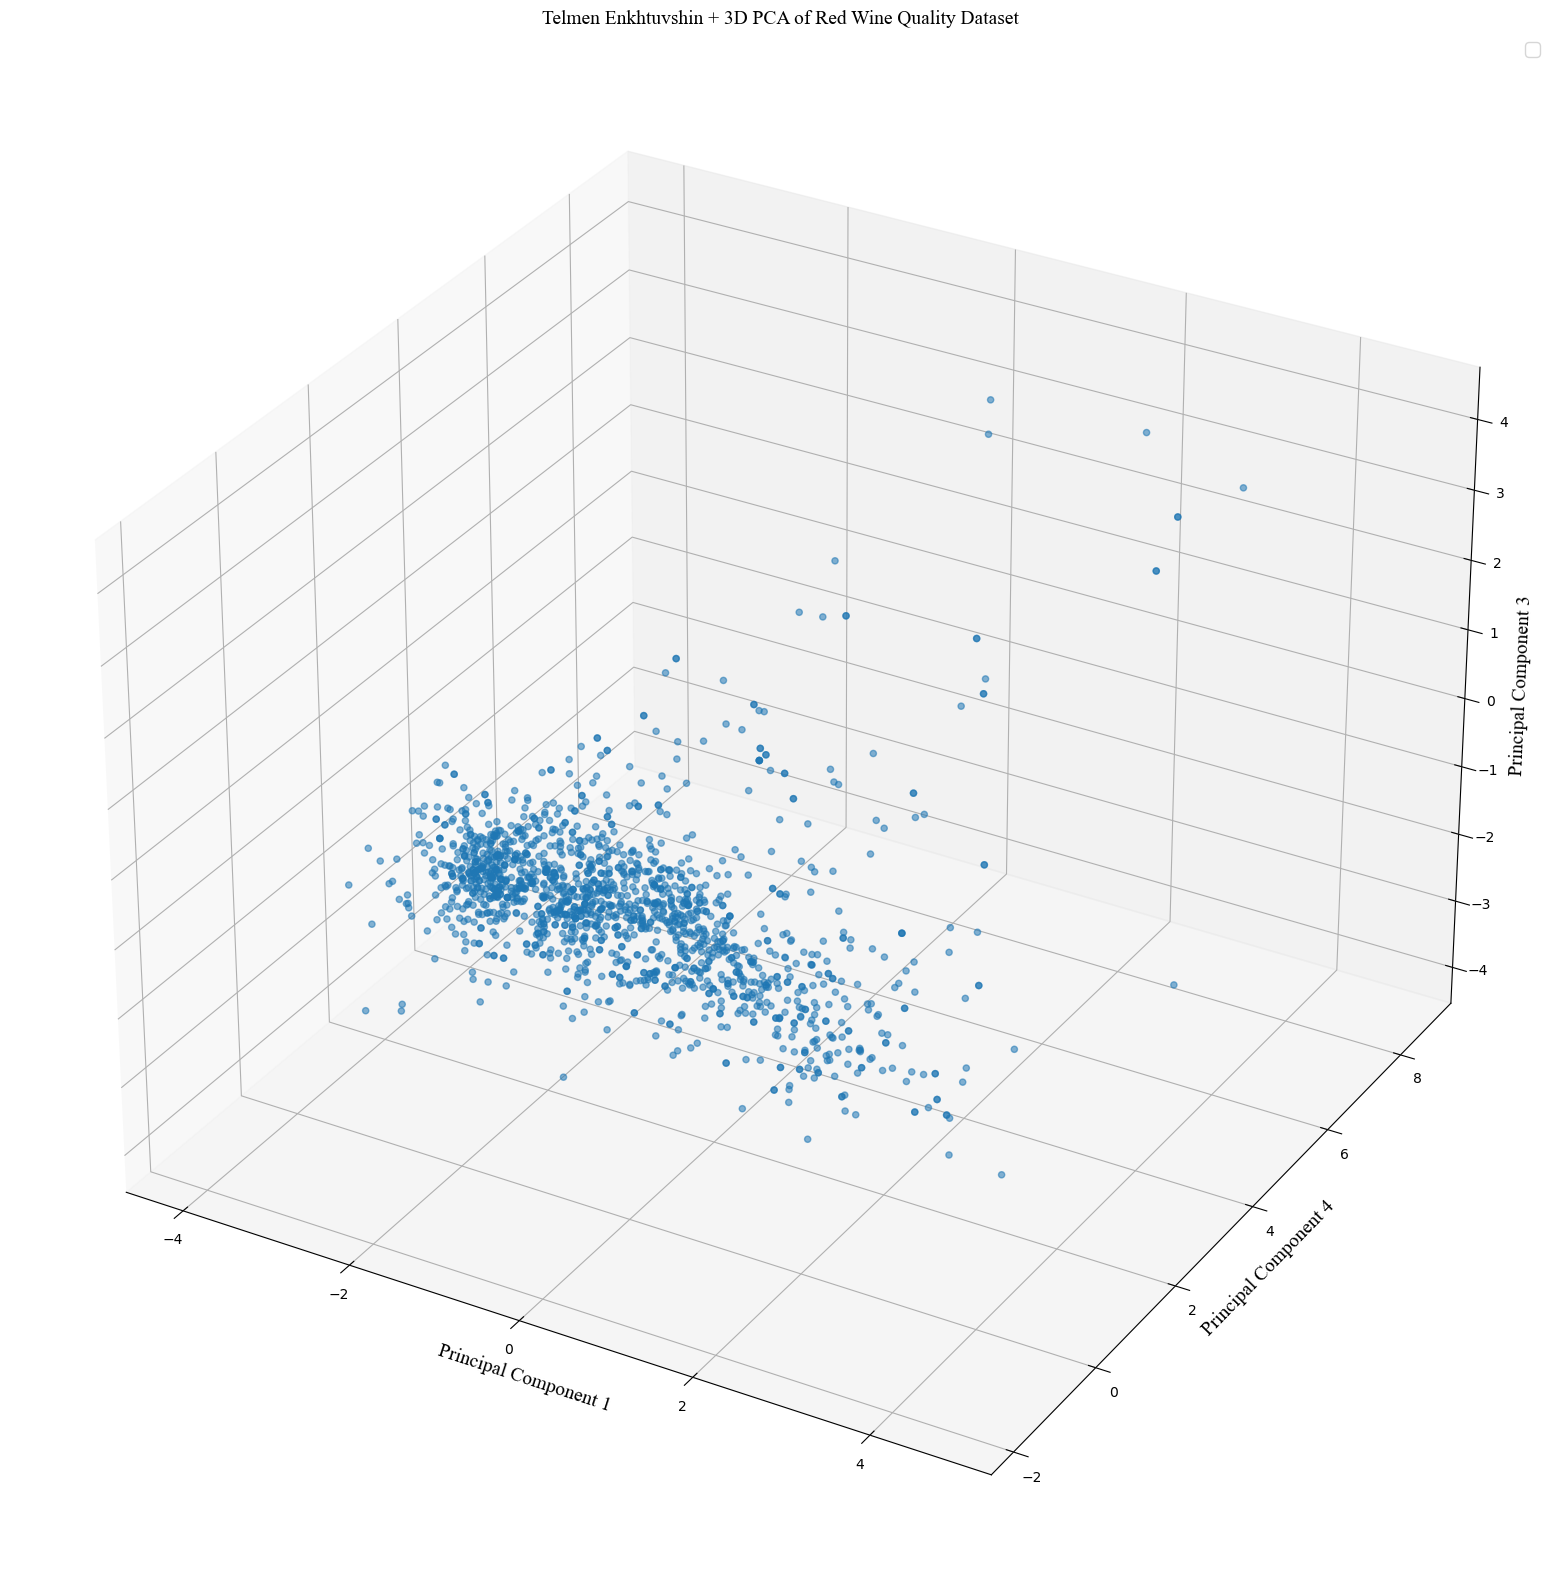

In [50]:
#3D PCA
pca3d = PCA(n_components=3)
columns=['PC1', 'PC4', 'PC3']

# your code
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Reduce to 3 principal components
X_pca_3d = pca3d.fit_transform(X_scaled)
pca3d_df = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC4', 'PC3'])

# Print explained variance ratio for 3D
print("3D PCA Explained Variance Ratio:")
print(pca3d.explained_variance_ratio_)

# 3D Scatter Plot
fig = plt.figure(figsize=(28, 20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca3d_df['PC1'], pca3d_df['PC4'], pca3d_df['PC3'], alpha=0.55)

ax.set_xlabel('Principal Component 1', fontname='Times New Roman', fontsize=14)
ax.set_ylabel('Principal Component 4', fontname='Times New Roman', fontsize=14)
ax.set_zlabel('Principal Component 3', fontname='Times New Roman', fontsize=14)
ax.set_title('Telmen Enkhtuvshin + 3D PCA of Red Wine Quality Dataset', fontname='Times New Roman', fontsize=14)
ax.legend(loc='best', prop=times_new_roman)
plt.savefig("Lab5-Telmen_Enkhtuvshin-3dPCA.png", dpi=300, bbox_inches='tight')

plt.show()


### As we can see from the 3D plot above, we have extended the plot from comparing PC1 and PC4, to adding PC3 to compare three Principal Components at the same time. When we added PC3, the dimension extended to 3D view.  But when we look closer, PC3 does not fully give wide dispursion of point. We can see that most of the points are clusted in negative value PC3, and some outliers are positioned in positive value areas. Thus overall, we can conclude that PC3 has inverse relationship with PC1 and PC4 respectively.

In [35]:
pca3d_df

,PC1,PC4,PC3
0,-1.739973,-0.097982,-0.401199
1,-2.026003,0.720048,-1.116774
2,-1.597675,0.290128,-0.713946
3,2.501777,-0.815517,-0.279261
4,-1.739973,-0.097982,-0.401199
...,...,...,...
1594,-1.577110,-0.281000,0.424499
1595,-1.449297,-0.256580,0.768257
1596,-1.100071,-0.252691,0.795486
1597,-1.663264,-0.216669,0.338453


# PCA Plot 3:

/var/folders/bh/tz_v5z2j1jx4qw3qxzb4nd180000gn/T/ipykernel_30816/2469497748.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(xs, ys, cmap='viridis', alpha=0.5, label='Red Wine points', color='green')


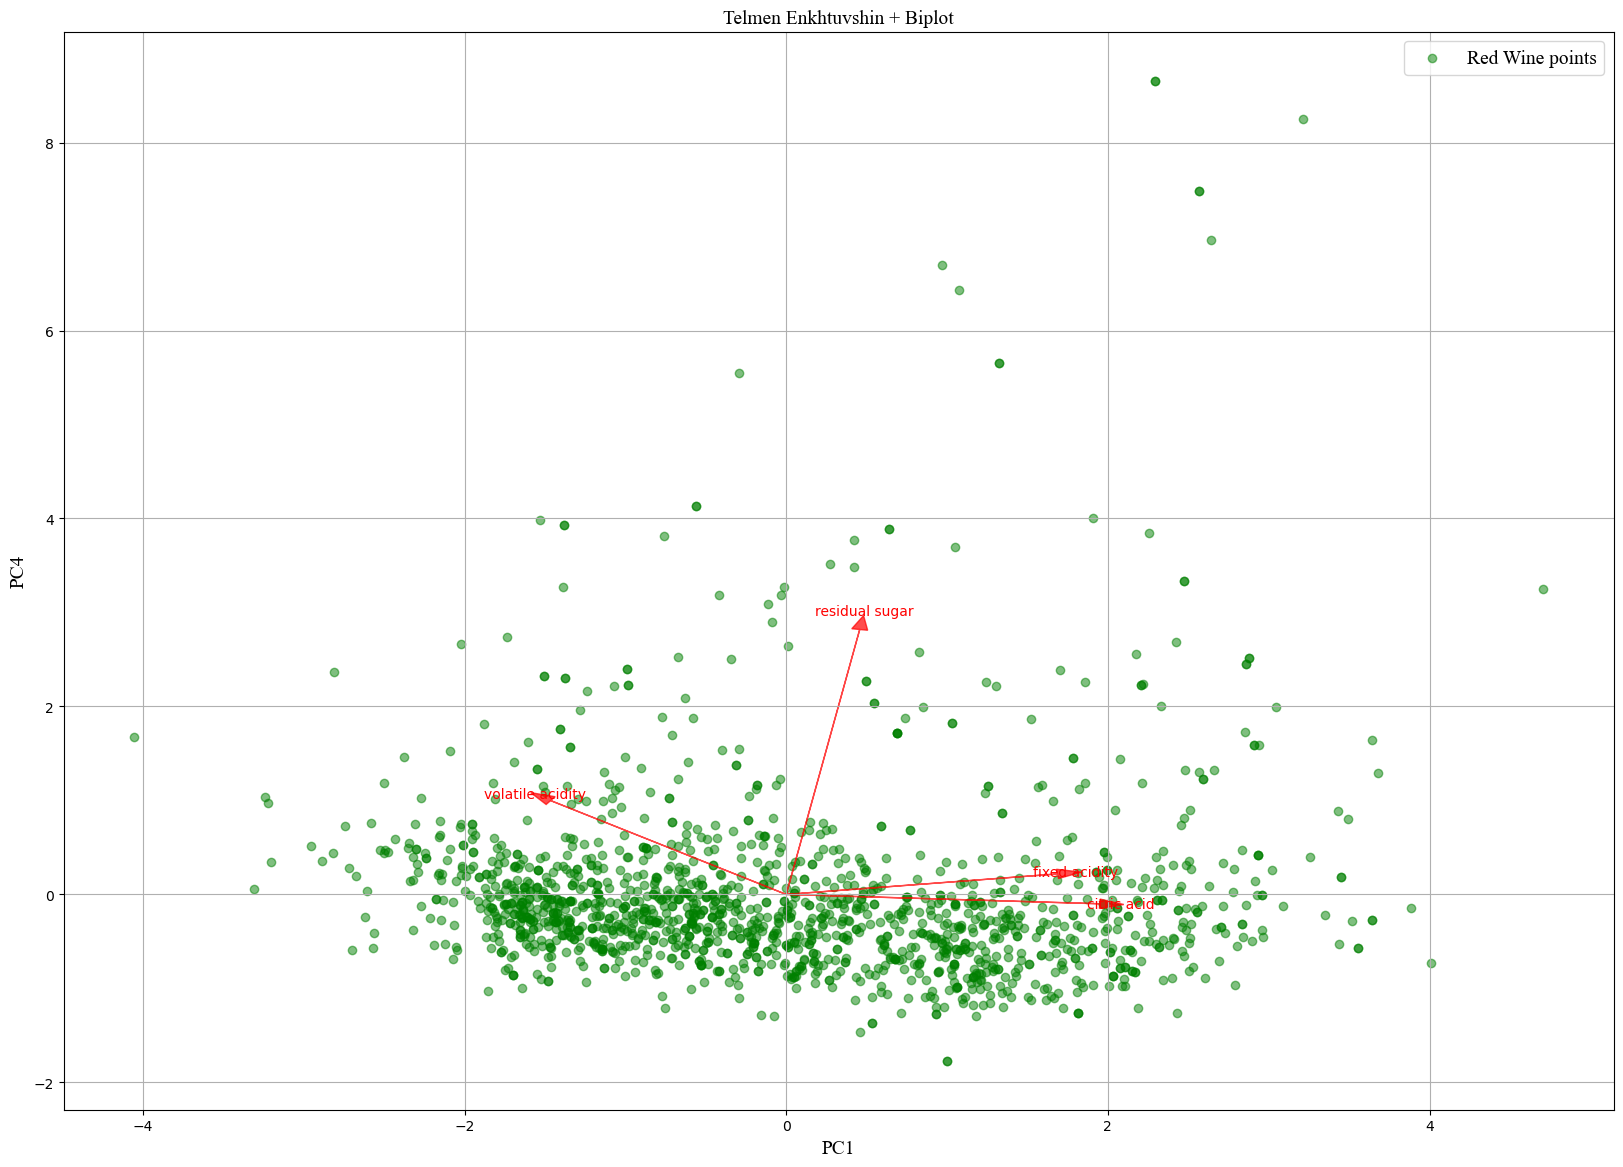

In [63]:
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    plt.figure(figsize=(20, 14))
    # Scatter plot of the PCA scores
    plt.scatter(xs, ys, cmap='viridis', alpha=0.5, label='Red Wine points', color='green')
    
    for i in range(n):
        # Plot arrows for feature loadings, scaled for visibility
        plt.arrow(0, 0, coeff[i, 0] * 3, coeff[i, 1] * 3, color='r', alpha=0.7, head_width=0.1)
        if labels is None:
            plt.text(coeff[i, 0] * 3.2, coeff[i, 1] * 3.2, "Var"+str(i+1), color='r', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 3.2, coeff[i, 1] * 3.2, labels[i], color='r', ha='center', va='center')
    plt.xlabel("PC1", fontname='Times New Roman', fontsize=14)
    plt.ylabel("PC4", fontname='Times New Roman', fontsize=14)
    plt.title("Telmen Enkhtuvshin + Biplot", fontname='Times New Roman', fontsize=14)
    plt.grid(True)
    plt.legend(loc='best', prop=times_new_roman)
    plt.savefig("Lab5-Telmen_Enkhtuvshin-BiPlotPCA.png", dpi=300, bbox_inches='tight')
    plt.show()

# Calculate the loadings for the 2D PCA (these are the eigenvectors for PC1 and PC2)
loadings = pca2d.components_.T

# Create a biplot using the 2D PCA scores and loadings
biplot(X_pca_2d, loadings, labels=feature_names)

In [52]:
X_pca_2d

array([[-1.73997267, -0.09798162],
       [-2.02600275,  0.72004765],
       [-1.59767482,  0.29012794],
       ...,
       [-1.10007067, -0.25269116],
       [-1.66326386, -0.21666904],
       [ 0.62360242,  0.17163256]])

### We can see from this plot that the Biplot shows the loadings of the variables in the Principal Components. The four variables are volatile acidity, fixed acidity, citric acid, and residual sugar. From our perspective, fixed acidity and citric acid have strong direct relationship with PC1 and residual sugar has a lowered but still strong relationship with PC4 as well as a little amount of weak direct relationship with PC1. Lastly, we can see that volatile acidity has strong inverse relationship with PC1, but weak direct relationship with PC4. This way, we can see that the variables have strong magnitude where the relationships to each components are understood.